Project 3 group 1

Lennart Greifenhain, Lukas Voos, Dzianis Yarotzki, Christopher Heidebrecht
***
# Digit Recognition 

## 1. Introduction
In this project we created a program that can recognize hand-written digits using the k-nearest neighbors algorithm (KNN). 
We used two different MNIST data sets: one for training the KNN algorithm and one containing images to be recognized by KNN -
containing 60 000 and 10 000 images and their label, stating which digit the images show. 
Each image is a 28 * 28 pixel greyscale digit from 0 to 9 drawn, previously centered around their centers off mass. 
### KNN Algorithm
We used the KNN algorithm to predict the right digit. It calculates the distance of all training digits to the image to be recognized,
sorts them and picks the k training images with the lowest distance. The most frequent digit among them will be picked as 
prediction. If k=7, only the 7 nearest neighbours to the test image are used. Let us say two of these neighbours have label "5", one - label "7" and 4 neighbors - label "9".In this case, the predicted digit will be a "9"
### PCA
We also performed a principle component analysis (PCA) to reduce the dimensionality of all images. 
#### It starts with centering of the data: 
The average gray value among all images for 784 pixels was calculated, embodying the center of the data. 
This average values were subtracted from the gray values of every sample leading to the mean of 0 for every pixel. 
In other words, the center of the data was subtracted from every sample. This center is now the origin. 
This transformation does not alter the relative position of the data points.
#### PCA itself:
After centering, we have a space of 784 dimensions with calculated center of the data as origin and the data points with the coordinates as a 784 dimensional vector.
Then, we draw the line through the origin, which fits our data in a best way.
The criteria for "best fitness" is the maximum possible sum of squared projections of data points vectors onto this line going through the origin.
The found line is our PC1 (the first principal component). The PC2 also goes through the origin, also has to have the maximum sum of squared projection, and additionally, 
is perpendicular to the PC1. PC3 saves all qualities of a best fitting line, but is perpendicular to both PC1 and PC2. This goes till the 784 PCs - the largest number of perpendicular lines in 784 dimensional space.

Our data points have known projections onto the PCs - they can be restored as points in a new PC-space.

The criteria for the "best fitting" line - the sum of squared projections onto particular PC - is used to calculate the variation explained by this PC.
Variation explained by particular PC is the sum of squared projections onto this PC divided on the number of samples minus 1.
This variation can be transformed to the percentage of explain variance by every single PC by summing the variations for all 784 PCs and then dividing the variation of every single PC on this sum.
The first PCs have much higher values of explained variance due to the way the PCA works.


Taking only the most significant PCs results in both noise reduction and loss of information, but also speeds up the KNN 
because it gets less input data.



# 2. Import functions
The import statements below are necessary for running the later code cells. `%matplotlib inline` will draw the
calculated plots to this Jupyter Notebook. Most of these modules are self-written modules building themselves upon external
python packages, except numpy, which allows quick and specific array operations.

In [1]:
%matplotlib inline
from src import pca
from src import pickle_operations as pickle_io
from src import plot
from src import KNN_sklearn as knn_sklearn
from src import meta_digit_operations as meta_digit
from src import knn_clustering
from src import load_image_vectors
import numpy as np
print("finished import")


finished import


# 3. Loading training and test images from MNIST dataset
The original MNIST dataset is split up into two binary files containing the images, and two binary files containing the labels, saying which digits are displayed on each image.
We use a preprocessed version of MNIST, where labels and images are merged, yielding a plain text file for training and test images (.csv) that was 
compressed (.csv.gz) for not exceeding github's upload size limit.
For further analyzing the MNIST dataset it is required to load them first.   

In [2]:
training_lists = load_image_vectors.load_gz('data/mnist_train.csv.gz')
test_lists = load_image_vectors.load_gz('data/mnist_test.csv.gz')
print("Successfully loaded image lists")


Successfully loaded image lists


# 4. Test for digit prediction
To see if the KNN algorithm works, the first ten test images are recognized and plotted with their prediction.
For k, a random number was chosen, which means a random numbers of nearest neighbors to the Test image are selected.
And that label from test list images that has the most neighbors to the tet image is the label for the predicted digit. 


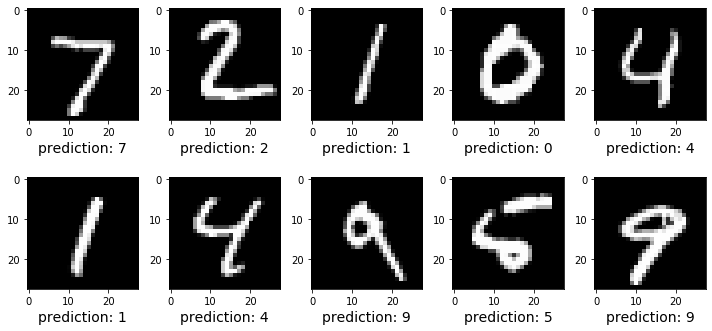

finished digit prediction


In [3]:
knn_sklearn.plot_sample_recognitions(training_lists, test_lists, 7)
print("finished digit prediction")


The plot shows that the KNN algorithm works well enough to accurately recognize a small set of images.


# 5. K accuracy test
In this step we try to determine the best amount of k-nearest neighbors we should use to have the most accurate prediction
possible. The function plots a bar chart for various k values and shows the percentage of correct digit predictions.
The plot shows a maximum for k = 3. That means for k=3 neighbours our KNN algorithm predicts the right digit with around 97% accuracy.
It is not suggested to calculate the accuracies on runtime because it will take too much time. That's why the precalculated
accuracies are loaded and plotted. 

The differences in accuracy can be explained because even values for k are inferior. In case of a tie between two digits, the prediction is chosen randomly between them.
If k is chosen too big, there is a risk that digits with too much distance are included. 



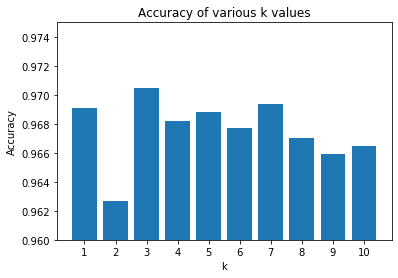

finished k_accuracy_test


In [4]:
# runs the k_accuracy test with 10000 images between the chosen k values (k_min, k_max) > then plots the result
# plot.k_accuracy_test(training_lists, test_lists, 1, 4)  # saves the result as k_accuracy2.dat
plot.plot_k_accuracy(pickle_io.load_pickles("data/k_accuracy.dat"))
print("finished k_accuracy_test")
    

# 6. PCA variance analysis
The KNN algorithm, our core-function of the project, works as intended. The biggest drawback is the long computing duration.
Through Principal Component Analysis (PCA) running time can be reduced significantly, while retaining a high accuracy.
The diagram shows the retained variance per principal components (called dimensions in this graph).
It can be seen that the first dimensions explain by far the highest variance while the last dimensions explain almost none.


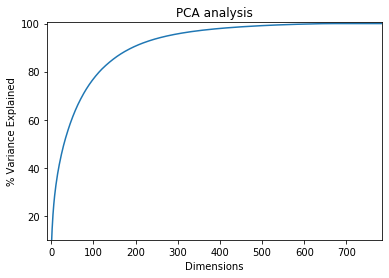

finished pca_variance_analysis


In [5]:
# runs the pca_variance_analysis and plots it
plot.pca_variance_analysis([csv_image.image for csv_image in test_lists])
print("finished pca_variance_analysis")


# 7. Plotted images with reduced dimensions
Since we were curious how the images look with reduced dimensions, we plotted the images with 
reduced dimensions and compared them with the original digits.
This function plots the original image shown on the left side and on the right side the images with reduced dimensions.
The package scikit-learn provides a function that reconstructs images with the original amount of dimensions (784) from 
a dimension reduced image vector. As you can see the overall number is still visible but the pixels are bigger and also 
the pictures seem blurred. In addition to that, the black background is now grey in the reduced images. Furthermore, it can be seen 
that there seems to be a black border around each digit and the grey background have different grey intensities compared
to each other. 

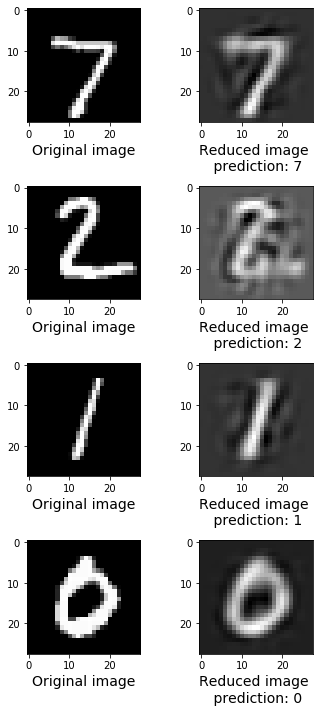

finished pca-visualization


In [6]:
reduced_images = pca.reduce_dimensions([csv_image.image for csv_image in training_lists], 
                                       [csv_image.image for csv_image in test_lists], 100)
pca.plot_sample_reductions(reduced_images[2], training_lists, test_lists, reduced_images[0],  reduced_images[1], reduced_images[3], 100)
print("finished pca-visualization")


# 8. Show an image reconstructed from a different number of dimensions
Next, to make sure our PCA is working properly and for experimental purposes, we try to see the results of the
PCA for different dimensions and to reverse the PCA. Firstly, PCA is performed with 784 dimensions, thus keeping all variance but rearranging them to principal components.
Then, reconstructed images are created from the first x principal components, making it obsolete to run the PCA once for
each subplot. We can see that the less dimensions we use the blurrier the image becomes.
However, even when using only 10 dimensions, the image can be recognised.
Also the background seems have a different grey 
intensity for every different dimension value.

PCA finished successfully
finished pca-visualization


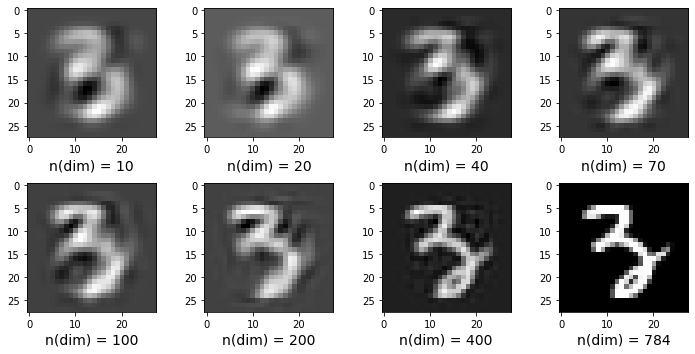

In [7]:
# Get reduces training and test images as tuple - reduced_images[0] is train_list, [1] is test_list without digits
reduced_images = pca.reduce_dimensions([csv_image.image for csv_image in training_lists],
                                        [csv_image.image for csv_image in test_lists], 784)
print("PCA finished successfully")
pca.plot_inverse_transforms(reduced_images[2], reduced_images[1], reduced_images[3])
print("finished pca-visualization")

# 9.PCA accuracy test
After that, the PCA variance is determined and plotted so we can find out the amount of dimensions necessary 
to have the highest accuracy to predict the right digit. The plot shows a slightly increased accuracy around n=78 compared
to a higher number of dimensions, which can be explained by noise reduction. Thus, for later PCA's n=78 will be used.

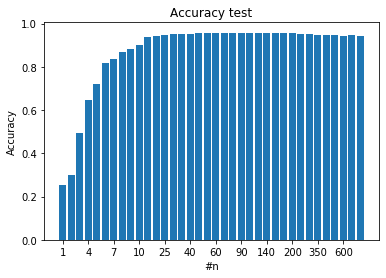

finished pca_accuracy_test


In [8]:
plot.plot_pca_accuracy(pickle_io.load_pickles("data/pca_accuracy.dat"))
print("finished pca_accuracy_test")


# 10. Finding meta digits
Next, the objective is to obtain the best recognizable image for each digit.
For this, three different methods are used and later compared: the mean and the median of all intensity values for all
images of the same digit and the image that is surrounded by most images with the same digit.
Finding the meta digit allows evaluating digits and analyzing wrongly recognized images. We create two different sets of meta digits:
mean meta digits (mean value among all images for every pixel) and median meta digits( mean value among all images for every pixel). 
The obtained two types of digits are plotted below.


## Mean digit


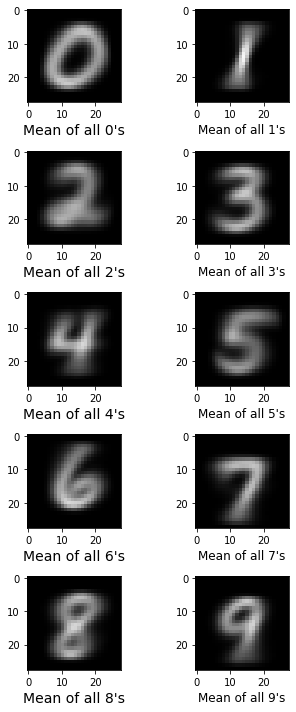

finished mean_digits


In [9]:
meta_digit.show_mean_digits(training_lists)
print("finished mean_digits")

## Median digit



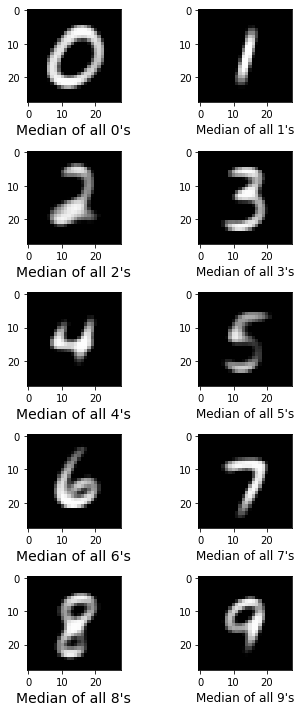

finished median_digits


In [10]:
meta_digit.show_median_digits(training_lists)
print("finished median_digits")

## Best surrounded digit
Next, the most clearly recognized images are calculated. For doing so, a KNN is run for all images of the same 
digit and k=500, the images with the highest amount of neighbors with the same digit are kept.

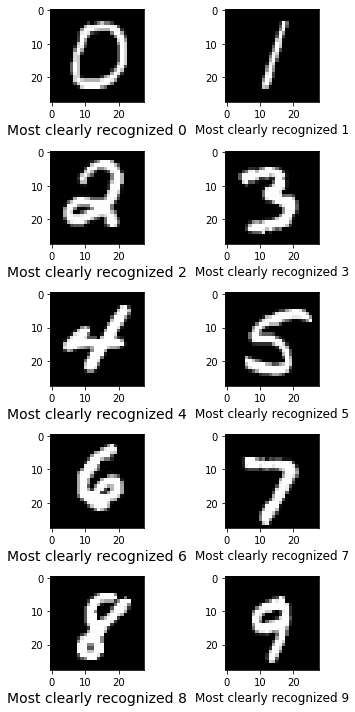

In [17]:
best_digits = np.asarray([csv_image.image for csv_image in meta_digit.get_best_digits(training_lists, test_lists)])
meta_digit.show_best_digits(best_digits)

The mean digits are blurrier than the MNIST images, because more pixels have an intensity greater than 0, so most previously 
white pixels, turn into gray. This feature makes mean digits look different than MNIST images.
The median digits are more or less binary images, mostly containing pure black and pure white values. Since 
many MNIST images of the same digit have different size, rotation or general shape, the median image has less white
pixels than MNIST images and thus loses part of the characteristics of those images and should be rejected.
The most clearly recognized image meanwhile is part of the MNIST dataset and can be used for operations like the
KNN algorithm. It might have turned out into a slightly different one by altering k but is still good enough
for it's purpose.

## 11. Showing common mispredictions
Afterwards, our goal was to find out which digits get mixed up most often and why.  
To visualize it, a heatmap is created, showing how often which digits are mistaken with another one.
For speeding this up and using the effect of noise reduction, a PCA has been run beforehand.
As you can see the most digits are "4" that are confused with "9" and "7" that are
confused with 9. Another often wrong predicted digit is "7" which is confused with "9".
The heatmap gives us a possible description why our algorithm makes mistakes: mainly because of 
similarities between some particular digits. Another exciting thing about the heatmap is that it is not symmetric. There are more 
"4" that are confused with a "9" than "9" confused with "4". The same is the case for "7".


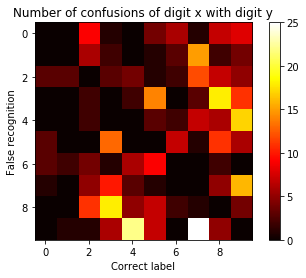

finished misprediction_heatmap


In [13]:
%autoreload 2
knn_clustering.get_mispredictions(training_lists, test_lists)
print("finished misprediction_heatmap")


To find out what the falsely predicted digits look like, we implemented a function that plots
the digit if it is predicted wrongly. In the next plot we just show some of the befuddling digits
that show well why our program makes mistakes. In the left column the best recognized "7" is
plotted. The middle column shows our falsely evaluated test image and in the right hand column is the digit
which the test image was mistaken for. As you can see, our dataset contains "7" written in very
different ways. In the first row, there is a small part going down at the top line of the "7"
that the algorithm confuses with the circle of a nine. The second and third row show "7" 
with the typical european horizontal line through "7" that made it show more similarities
to a "2" or a "3" than most of the other "7". Sometimes the digits from the dataset are
just bizarre, as you can see in row 4, they probably would not be recognized as a "7" even by a human eye.


In [14]:
knn_sklearn.show_wrong_predicted(training_lists, test_lists, best_digits)
print("finished show_wrong_predicted")#%%


NameError: name 'best_digits' is not defined

These results also explain why the heatmap before is not symmetrical: 
some images of certain digits are often written differently and thus the image vectors get closer to those of a 
different digit, while that digit is not written differently that often.

# Discussion 
In conclusion, all main goals of our project have been achieved. We wrote our own KNN algorithm and were able to accurately recognize digits at the very beginning of our project. Further work was mainly improvements and optimizations of this algorithm. We decided to use a KNN function from scikit-learn, which significantly increased the speed of our calculations. We also performed PCA which not only accelerated the calculations, but also increased the accuracy by noise reduction. We have found which values for parameters as number of neighbors for KNN and number of dimensions for PCA correspond to the peaks of accuracy in digit recognition. Although using only the first two PCs allowed us to predict the label of an image with more than 30% probability, the variance, explained by PC1 and PC2, hardly amounts to 10%. Therefore we had to discard the idea to plot our data in the representative 2D space. After we performed PCA, we have drawn the obtained reduced images and have seen that the PCA extracted the “essence” of the images. That made it possible to correctly recognize digits restored from the first 10 PCs using KNN and our subjective human eyes as well.


As one of the last parts of our main project, we calculated three different “meta digits”: mean, median and “with best neighbors”. We calculated the average distance from these different meta digits to the digits with the same label. The mean digit has the lowest average distance, while the “best neighbored” has the highest. These average distances give some information about how tight the digits with the same label are clustered. Although the “best neighbored” digit has the highest average distance, we have selected it as meta digit for further calculations in the part, in which we evaluated our own written digits. The reason is, that only this type of meta digit represents the real existing data point, while other are the mixture of many digits with the same label.


Finally, we have made the drawing canvas and identified which images were falsely recognized by our algorithm even with fully optimized parameters. Digits are more often falsely recognized due to the fact that they have many different writing-styles or are suffering from wrong centering. The best example for both cases is “7”, which sometimes has a middle touch and sometimes does not and is also very variable in the position of the highest horizontal line. The digits that are commonly mixed up are determined by the structural similarity, like “4” and “9” or “9” and “7”. 


All in all, our must-have project answered some crucial questions about digit recognition with KNN and figured out some important parameters together with some features in our dataset structure. These results were used in our additional project (the drawing canvas), which we will gladly present on Thursday. 
